<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

In [2]:
# Read Titanic Dataset
titanic_csv = ('../../data/titanic.csv')
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

In [5]:
# Check rows, columns
titanic.shape

(891, 12)

## Check Types of Data

In [6]:
# Check DataTypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Check Null Values

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_long = pd.melt(titanic, id_vars='PassengerId')
titanic_long.head()

,PassengerId,variable,value
0,1,Survived,0
1,2,Survived,1
2,3,Survived,1
3,4,Survived,1
4,5,Survived,0


In [9]:
pd.pivot(titanic_long, index='PassengerId', columns='variable').droplevel(level=0, axis=1)

variable,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35,NaN,S,8.05,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2,NaN,S,21.075,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [10]:
titanic[titanic['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


So, There are 177 rows have missing `Age` values. We can use median values of `Male` & `Female` to fill those values.

In [11]:
# Check Age
# Check Median Age of Male, Female
titanic['Age'].fillna(titanic.groupby(by=['Sex'])['Age'].transform("median"), inplace=True) 

### Cabin

In [12]:
titanic[titanic['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [13]:
titanic['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
D              3
F2             3
C22 C26        3
C52            2
C93            2
D26            2
E33            2
F4             2
D33            2
C126           2
F G73          2
B51 B53 B55    2
E67            2
C65            2
B20            2
C124           2
E121           2
C78            2
C125           2
B49            2
E8             2
E24            2
E44            2
B22            2
B18            2
              ..
C111           1
E40            1
C101           1
B42            1
C46            1
D9             1
D21            1
A26            1
D10 D12        1
A5             1
C7             1
E31            1
B101           1
A34            1
D45            1
C62 C64        1
B79            1
D15            1
E49            1
C118           1
B19            1
F38            1
A32            1
E58            1
C104           1
C86            1
A23            1
A20           

Variation of cabin name is not helping. Remove numbers from `Cabin`.

In [14]:
# Consider only the  first character as cabin number
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)

In [15]:
# Check Cabin
titanic['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

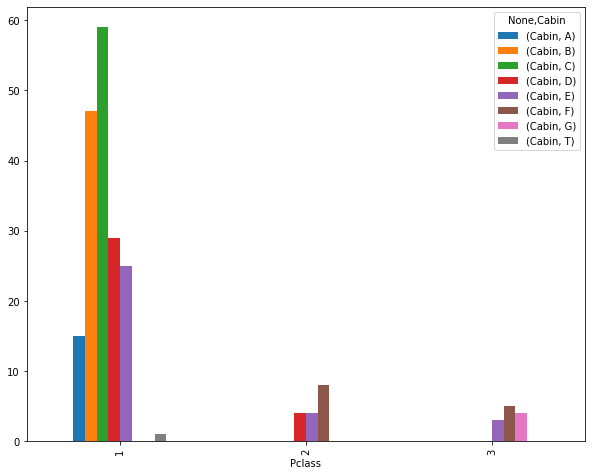

In [16]:
titanic.groupby(by=['Pclass', 'Cabin']).agg({'Cabin': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

It's clear from the plot that Cabin `A`, `B`, `C` & `T` is only available in Pclass `1`.

In [17]:
cabin_map = {
    'A': 1
    , 'B': 2
    , 'C': 3
    , 'D': 4
    , 'E': 5
    , 'F': 6
    , 'G': 7
    , 'T': 8
}
titanic['Cabin'] = titanic['Cabin'].map(cabin_map)

In [18]:
# Fill Cabin with Mean values
titanic['Cabin'].fillna(titanic.groupby(by=['Pclass'])['Cabin'].transform("mean"), inplace=True) 

In [19]:
# Remove Decimal Numbers
titanic['Cabin'] = np.round(titanic['Cabin'], decimals=0)

In [20]:
# Check Cabin
titanic['Cabin'].value_counts()

6.0    492
5.0    200
3.0     99
2.0     47
4.0     33
1.0     15
7.0      4
8.0      1
Name: Cabin, dtype: int64

### Embarked

In [21]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,2.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,2.0,NaN


In [22]:
titanic['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

As 72% Passenger embarked from `S`. We can fill 2 rows of null values with `S`.

In [23]:
titanic['Embarked'] = titanic['Embarked'].apply(lambda x: x if type(x) is str else 'S')

# Describe

In [24]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Thorneycroft, Mr. Percival",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891,NaN,NaN,NaN,29.4413,13.0187,0.42,22,29,35,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [25]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    # Find the percentage of people survived
    # df_feature = df_feature.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

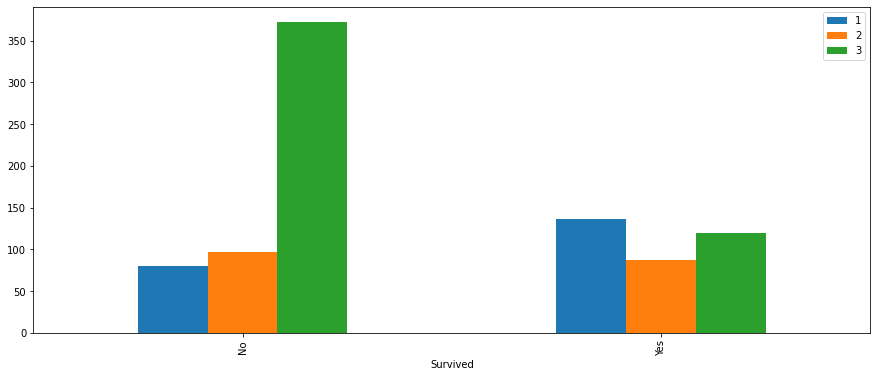

In [26]:
bar_charts(titanic, 'Pclass')

- Chance of survival is high, if passenger is in Pclass 1

## Sex

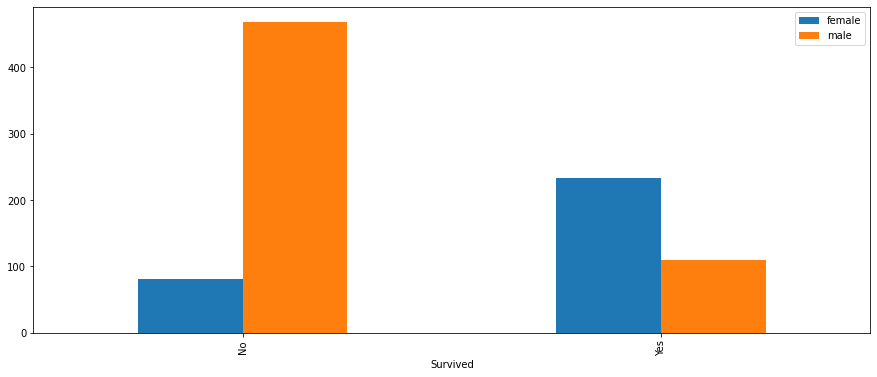

In [27]:
bar_charts(titanic, 'Sex')

- 80% Male Passenger Died

## Parch

Parch = Number of parents of children travelling with each passenger.

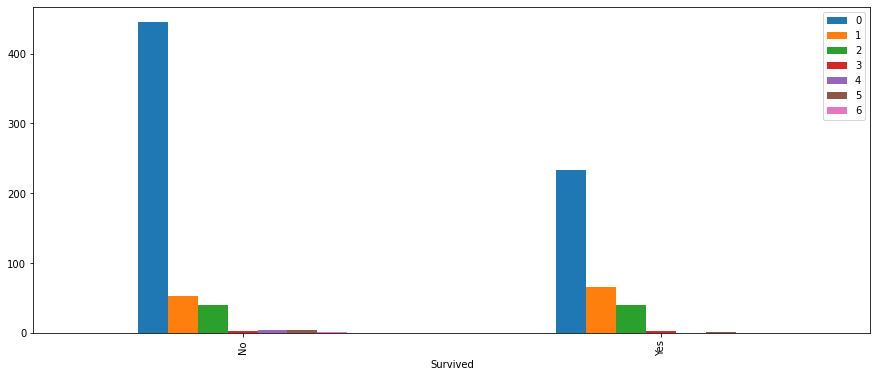

In [28]:
bar_charts(titanic, 'Parch')

- Chance of survival is low if passenger is traveling alone.

## SibSp

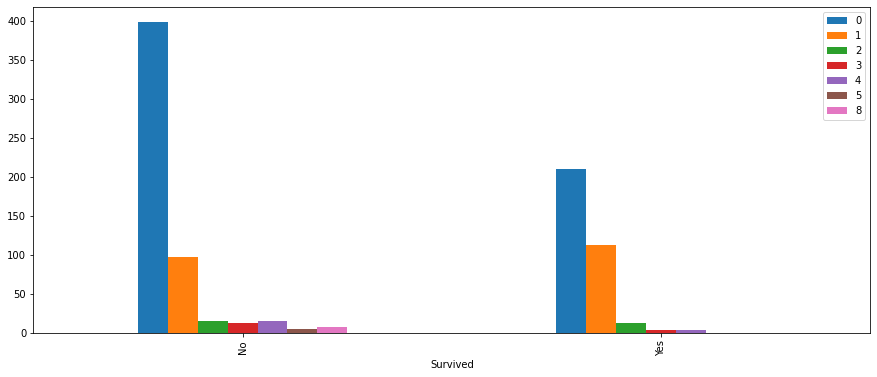

In [29]:
bar_charts(titanic, 'SibSp')

## Embarked

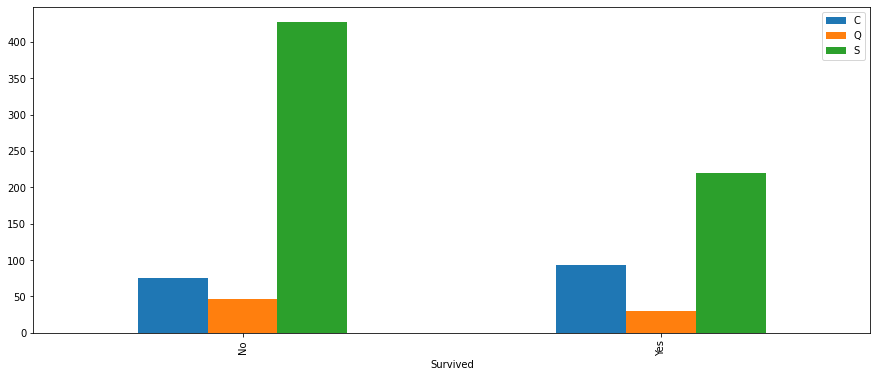

In [30]:
bar_charts(titanic, 'Embarked')

# Feature Engineering

Create some new features from existing feature.

## Fare Class

In [31]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [32]:
titanic['FareClass'] = titanic['Fare'].apply(create_fare_class)

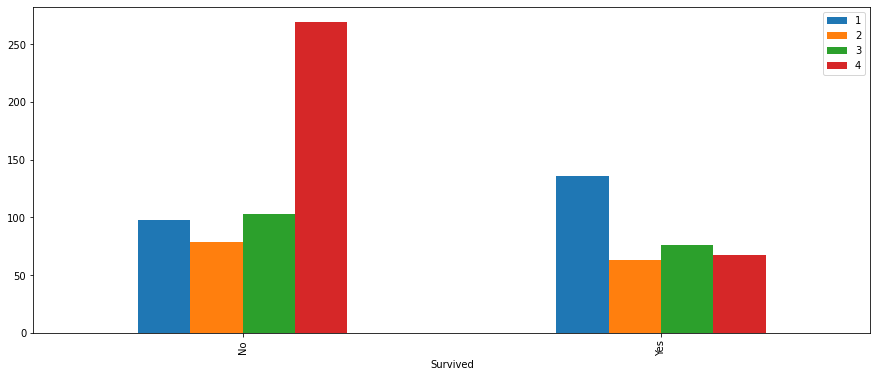

In [33]:
bar_charts(titanic, 'FareClass')

- Those who have paid more will likely to survive. 

## Age Class

In [34]:
titanic['Age'].value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
28.00     25
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
32.00     18
35.00     18
26.00     18
16.00     17
31.00     17
33.00     15
23.00     15
34.00     15
20.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
71.00      2
59.00      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
64.00      2
40.50      2
32.50      2
45.50      2
20.50      1
24.50      1
0.67       1
14.50      1
0.92       1
74.00      1
34.50      1
80.00      1
12.00      1
36.50      1
53.00      1
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [35]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [36]:
titanic['AgeClass'] = titanic['Age'].apply(create_age_class)

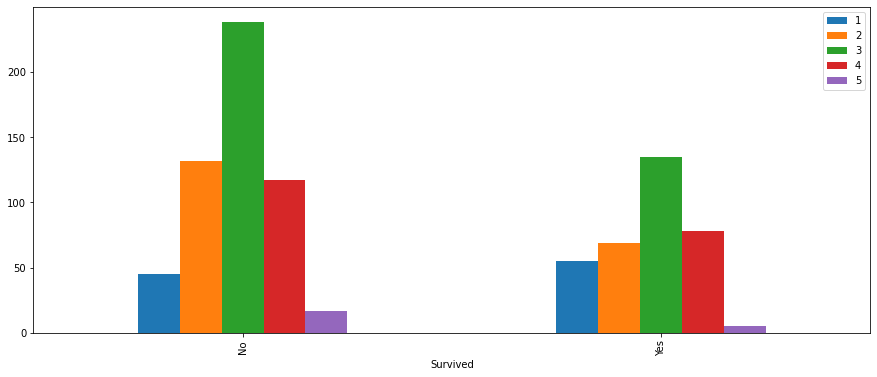

In [37]:
bar_charts(titanic, 'AgeClass')

# Staistical Overview

In [38]:
from scipy import stats

## Correlation

In [39]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,FareClass,AgeClass
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658,-0.040371,0.003258,0.026653
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,-0.289460,-0.307600,-0.067911
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,0.896218,0.719670,-0.292128
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,-0.306896,-0.113032,0.928753
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,0.080367,-0.380692,-0.232166
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,0.016520,-0.387100,-0.168121
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,-0.564177,-0.599129,0.075551
Cabin,-0.040371,-0.289460,0.896218,-0.306896,0.080367,0.016520,-0.564177,1.000000,0.644342,-0.260644
FareClass,0.003258,-0.307600,0.719670,-0.113032,-0.380692,-0.387100,-0.599129,0.644342,1.000000,-0.080506
AgeClass,0.026653,-0.067911,-0.292128,0.928753,-0.232166,-0.168121,0.075551,-0.260644,-0.080506,1.000000


In [40]:
titanic_young = titanic[titanic['Age'] <= 35].sample(100, random_state=42)
titanic_old = titanic[titanic['Age'] > 35].sample(100, random_state=42)

In [41]:
titanic_young['Survived'].value_counts()

0    58
1    42
Name: Survived, dtype: int64

In [42]:
titanic_old['Survived'].value_counts()

0    66
1    34
Name: Survived, dtype: int64

In [43]:
N = 100
a = titanic_young['Survived']
b = titanic_old['Survived']

In [44]:
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

In [45]:
s = np.sqrt((var_a + var_b) / 2)

In [46]:
t = (a.mean() - b.mean()) / (s * np.sqrt(2 / N))  # t-statistic
t

1.1635489477654783

In [47]:
df = 2 * N - 2

In [48]:
p = 1 - stats.t.cdf(t, df = df) # p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

t = 1.1635489477654783
p = 0.2460070975086459


In [49]:
def print_sig(p_, p_sig_):
    if (p_ <= p_sig_):
        print("Significant")
    else:
        print("Not significant")

In [50]:
p_sig = 0.05
t2, p2 = stats.ttest_ind(a, b)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, p_sig)

t = 1.1635489477654786
p = 0.246007097508646
Not significant


In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,6.0,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3.0,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,6.0,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3.0,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,6.0,S,4,3


In [52]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 100
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good 
# p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two 
# distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 14.308365114685083
p = 0.0
t = 14.308365114685083
p = 2.3520317341373237e-32


# Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [53]:
N = 100
age = 35

In [54]:
titanic_young = titanic[titanic['Age'] <= age].sample(N, random_state=42)
titanic_old = titanic[titanic['Age'] > age].sample(N, random_state=42)

In [55]:
titanic_young['Survived'].value_counts()

0    58
1    42
Name: Survived, dtype: int64

In [56]:
titanic_old['Survived'].value_counts()

0    66
1    34
Name: Survived, dtype: int64

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [57]:
alpha = 0.05

### Calculate point estimate

In [58]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [59]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [60]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [61]:
## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [62]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 1.1635489477654783
p = 0.2460070975086459


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [63]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [64]:
print_sig(p, alpha)

We fail to reject our null hypothesis.


In [65]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 1.1635489477654786
p = 0.246007097508646
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



